In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [ ]:
data.head(10)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [ ]:
data.shape

(106, 3)

In [ ]:
data.dtypes

,0
Class,object
id,object
Sequence,object


In [ ]:
# Refining and structuring the data

# Build our dataset using custom pandas dataframe
classes = data.loc[:,'Class']
classes.head()
print()
print(classes.value_counts())


Class
+    53
-    53
Name: count, dtype: int64


In [ ]:
# generate list of DNA sequence
sequence = list(data.loc[:, 'Sequence'])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [ ]:
#Remove tab from each sequence
dic = {}
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    #append class assignment
    nucleotides.append(classes[i])

    dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [ ]:
# Convert Dict object into dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [ ]:
# transpose dataframe into correct format
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
# Rename the 57th column as it is our classes
df.rename(columns = {57:'Class'}, inplace = True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
temp = df.copy(deep=True)
temp = temp.drop(['Class'], axis = 1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [ ]:
# Encoding using one-hot encoder:

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp)
print(enc.categories_)
df1 = enc.transform(temp).toarray()
del temp
# df1[1:3]

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [ ]:
# Saving the one-hot encoder

import pickle

# Save the encoder to Google Drive in the E.coli-DNA folder
with open("/content/drive/MyDrive/E.coli-DNA/EColi-encoder.pickle", "wb") as f:
    pickle.dump(enc, f)

# Loading the file later:
# encoder = pickle.load(f)
# data = encoder.transform(df).toarray()

In [ ]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Fixing the classes column:

df["Class"] = df["Class"].replace(to_replace =["+"], value =1)
df["Class"] = df["Class"].replace(to_replace =["-"], value =0)
df_new["Classes"] = df['Class']
df_new.head()

<ipython-input-559-d95c47eef3f8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Class"] = df["Class"].replace(to_replace =["-"], value =0)


,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
#Encoding - Alternative
numerical_df = pd.get_dummies(df)
numerical_df.head()

,Class,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,...,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t
0,1,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,1,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,1,False,False,True,False,False,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False
3,1,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,1,False,False,False,True,False,True,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
# Training and Testing the Classification Algorithms

In [ ]:
y = df_new['Classes'].values# numerical_df['Class'].values
X = df_new.drop(['Classes'], axis = 1).values# numerical_df.drop(['Class'], axis = 1).values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

Training with  Machine Learning models and Deep Learning models!



**Multi Layer Perceptron**

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


In [ ]:
#Predicting y for X_val
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9259259259259259

In [ ]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



<Axes: >

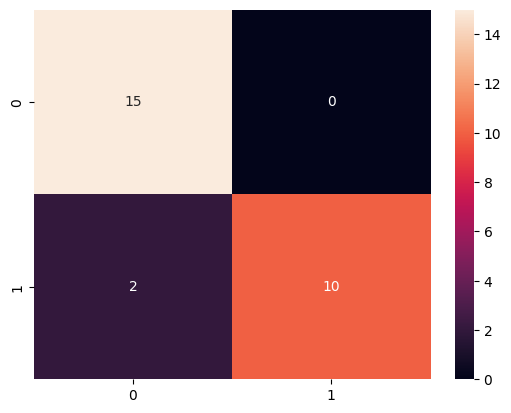

In [ ]:
#Importing Confusion Matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

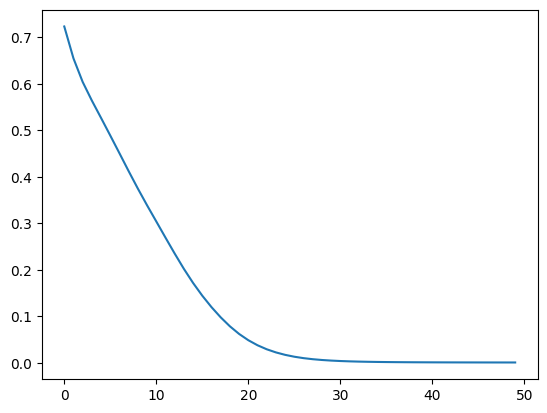

In [ ]:
# Plotting graph for MLPClassifier

loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

**K-Nearest Neighbors (KNeighborsClassifier)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing KNeighborsClassifier with optimized hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=5,           # Number of neighbors to use
    weights='distance',      # Weight points by the inverse of their distance
    metric='minkowski',      # Distance metric to use
    p=2                      # Power parameter for the Minkowski metric (2 for Euclidean)
)


In [ ]:
knn.fit(X_train, y_train)
print("Training Accuracy:", knn.score(X_train, y_train))


Training Accuracy: 1.0


In [ ]:
# Predicting y for X_test
y_pred_knn = knn.predict(X_test)
print("Test Accuracy:", knn.score(X_test, y_test))


Test Accuracy: 0.7037037037037037


In [ ]:
from sklearn.metrics import classification_report

# Classification report
print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        17
           1       0.56      1.00      0.71        10

    accuracy                           0.70        27
   macro avg       0.78      0.76      0.70        27
weighted avg       0.84      0.70      0.70        27



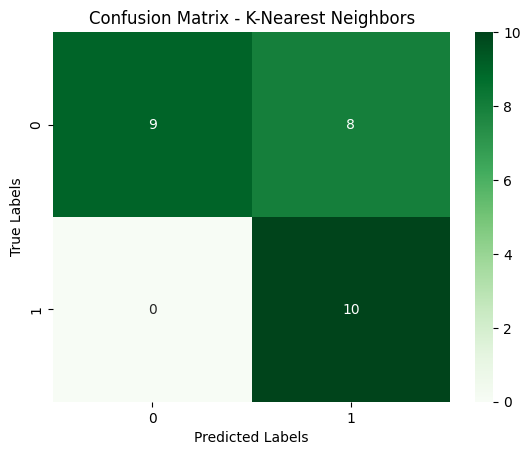

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizing the Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()


**Gaussian Process Classifier (GaussianProcessClassifier)**

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Defining the kernel with RBF and WhiteKernel
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)

# Initializing GaussianProcessClassifier with optimized hyperparameters
gpc = GaussianProcessClassifier(
    kernel=kernel,
    n_restarts_optimizer=10,  # Number of restarts for the optimizer
    max_iter_predict=100,     # Maximum iterations for prediction
    random_state=42
)


In [ ]:
gpc.fit(X_train, y_train)
print("Training Accuracy:", gpc.score(X_train, y_train))


Training Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
# Predicting y for X_test
y_pred_gpc = gpc.predict(X_test)
print("Test Accuracy:", gpc.score(X_test, y_test))


Test Accuracy: 0.8888888888888888


In [ ]:
# Classification report
print("Classification Report for Gaussian Process Classifier:")
print(classification_report(y_test, y_pred_gpc))


Classification Report for Gaussian Process Classifier:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27



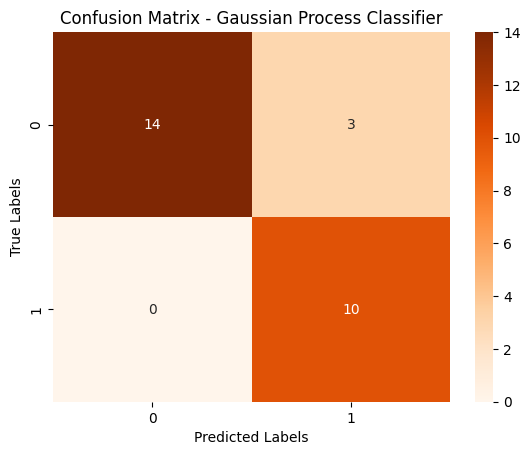

In [ ]:
# Confusion Matrix
cm_gpc = confusion_matrix(y_test, y_pred_gpc)

# Visualizing the Confusion Matrix
sns.heatmap(cm_gpc, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian Process Classifier')
plt.show()


**Decision Tree Classifier (DecisionTreeClassifier)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing DecisionTreeClassifier with optimized hyperparameters
dt = DecisionTreeClassifier(
    criterion='gini',          # Function to measure the quality of a split
    splitter='best',           # Strategy used to choose the split at each node
    max_depth=10,              # Maximum depth of the tree
    min_samples_split=4,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    random_state=42
)


In [ ]:
dt.fit(X_train, y_train)
print("Training Accuracy:", dt.score(X_train, y_train))


Training Accuracy: 0.9620253164556962


In [ ]:
# Predicting y for X_test
y_pred_dt = dt.predict(X_test)
print("Test Accuracy:", dt.score(X_test, y_test))


Test Accuracy: 0.7777777777777778


In [ ]:
# Classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.64      0.90      0.75        10

    accuracy                           0.78        27
   macro avg       0.78      0.80      0.78        27
weighted avg       0.82      0.78      0.78        27



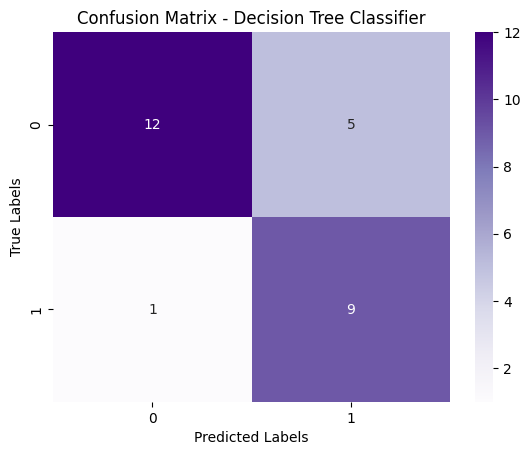

In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualizing the Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


**Random Forest Classifier (RandomForestClassifier)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing RandomForestClassifier with optimized hyperparameters
rf = RandomForestClassifier(
    n_estimators=100,          # Number of trees in the forest
    criterion='gini',          # Function to measure the quality of a split
    max_depth=10,              # Maximum depth of the tree
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    random_state=42
)


In [ ]:
rf.fit(X_train, y_train)
print("Training Accuracy:", rf.score(X_train, y_train))


Training Accuracy: 1.0


In [ ]:
# Predicting y for X_test
y_pred_rf = rf.predict(X_test)
print("Test Accuracy:", rf.score(X_test, y_test))


Test Accuracy: 0.8518518518518519


In [ ]:
# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.71      1.00      0.83        10

    accuracy                           0.85        27
   macro avg       0.86      0.88      0.85        27
weighted avg       0.89      0.85      0.85        27



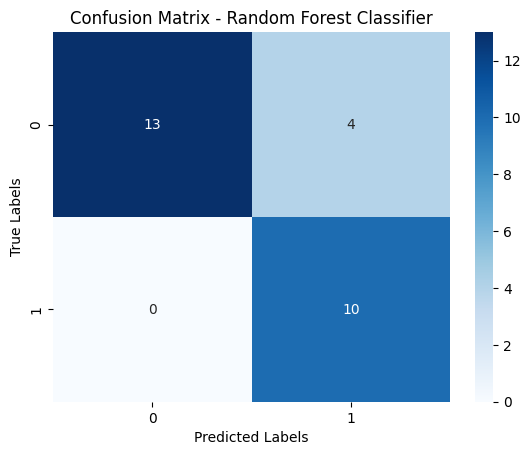

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizing the Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


**Gaussian Naive Bayes (GaussianNB)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initializing GaussianNB with optimized hyperparameters
gnb = GaussianNB(
    var_smoothing=1e-9  # Portion of the largest variance of all features to add to variances
)


In [ ]:
gnb.fit(X_train, y_train)
print("Training Accuracy:", gnb.score(X_train, y_train))


Training Accuracy: 0.9873417721518988


In [ ]:
# Predicting y for X_test
y_pred_gnb = gnb.predict(X_test)
print("Test Accuracy:", gnb.score(X_test, y_test))


Test Accuracy: 0.9259259259259259


In [ ]:
# Classification report
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb))


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



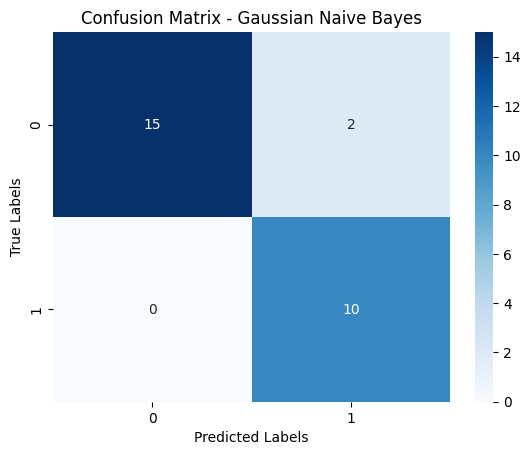

In [ ]:
# Confusion Matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Visualizing the Confusion Matrix
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()


**Support Vector Machine with Linear Kernel (SVC - Linear)**

In [ ]:
from sklearn.svm import SVC

# Initializing SVC with Linear Kernel and optimized hyperparameters
svc_linear = SVC(
    kernel='linear',
    C=1.0,                       # Regularization parameter
    class_weight='balanced',     # Adjust weights inversely proportional to class frequencies
    random_state=42,
    probability=True             # Enable probability estimates
)


In [ ]:
svc_linear.fit(X_train, y_train)
print("Training Accuracy:", svc_linear.score(X_train, y_train))


Training Accuracy: 1.0


In [ ]:
# Predicting y for X_test
y_pred_svc_linear = svc_linear.predict(X_test)
print("Test Accuracy:", svc_linear.score(X_test, y_test))


Test Accuracy: 0.9629629629629629


In [ ]:
# Classification report
print("Classification Report for SVM with Linear Kernel:")
print(classification_report(y_test, y_pred_svc_linear))


Classification Report for SVM with Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



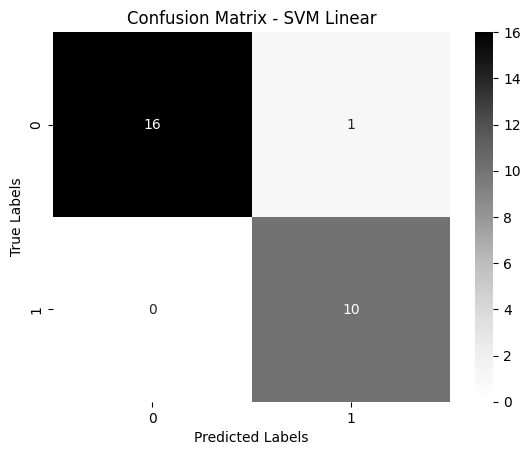

In [ ]:
# Confusion Matrix
cm_svc_linear = confusion_matrix(y_test, y_pred_svc_linear)

# Visualizing the Confusion Matrix
sns.heatmap(cm_svc_linear, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Linear')
plt.show()


**Support Vector Machine with RBF Kernel (SVC - RBF)**

In [ ]:
from sklearn.svm import SVC

# Initializing SVC with RBF Kernel and optimized hyperparameters
svc_rbf = SVC(
    kernel='rbf',
    C=1.0,                       # Regularization parameter
    gamma='scale',               # Kernel coefficient
    class_weight='balanced',     # Adjust weights inversely proportional to class frequencies
    random_state=42,
    probability=True             # Enable probability estimates
)


In [ ]:
svc_rbf.fit(X_train, y_train)
print("Training Accuracy:", svc_rbf.score(X_train, y_train))


Training Accuracy: 1.0


In [ ]:
# Predicting y for X_test
y_pred_svc_rbf = svc_rbf.predict(X_test)
print("Test Accuracy:", svc_rbf.score(X_test, y_test))


Test Accuracy: 0.9259259259259259


In [ ]:
# Classification report
print("Classification Report for SVM with RBF Kernel:")
print(classification_report(y_test, y_pred_svc_rbf))


Classification Report for SVM with RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



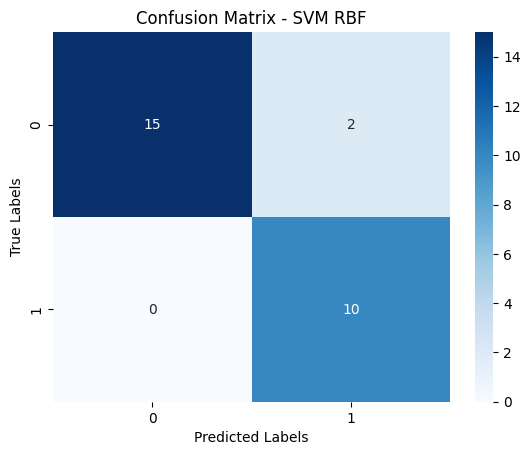

In [ ]:
# Confusion Matrix
cm_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)

# Visualizing the Confusion Matrix
sns.heatmap(cm_svc_rbf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM RBF')
plt.show()


**Support Vector Machine with Sigmoid Kernel (SVC - Sigmoid)**

In [ ]:
from sklearn.svm import SVC

# Initializing SVC with Sigmoid Kernel and optimized hyperparameters
svc_sigmoid = SVC(
    kernel='sigmoid',
    C=1.0,                       # Regularization parameter
    gamma='scale',               # Kernel coefficient
    coef0=0.0,                    # Independent term in kernel function
    class_weight='balanced',     # Adjust weights inversely proportional to class frequencies
    random_state=42,
    probability=True             # Enable probability estimates
)


In [ ]:
svc_sigmoid.fit(X_train, y_train)
print("Training Accuracy:", svc_sigmoid.score(X_train, y_train))


Training Accuracy: 0.9873417721518988


In [ ]:
# Predicting y for X_test
y_pred_svc_sigmoid = svc_sigmoid.predict(X_test)
print("Test Accuracy:", svc_sigmoid.score(X_test, y_test))


Test Accuracy: 0.9259259259259259


In [ ]:
# Classification report
print("Classification Report for SVM with Sigmoid Kernel:")
print(classification_report(y_test, y_pred_svc_sigmoid))


Classification Report for SVM with Sigmoid Kernel:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



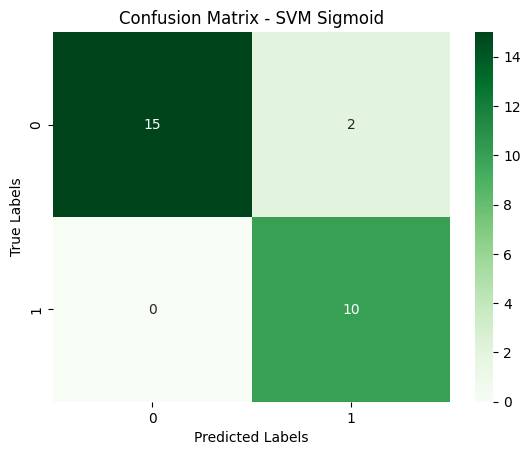

In [ ]:
# Confusion Matrix
cm_svc_sigmoid = confusion_matrix(y_test, y_pred_svc_sigmoid)

# Visualizing the Confusion Matrix
sns.heatmap(cm_svc_sigmoid, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Sigmoid')
plt.show()


In [ ]:
# save the model to disk

import pickle

# Save the model to Google Drive in the E.coli-DNA folder
filename = '/content/drive/MyDrive/E.coli-DNA/E-Coli_svc_sigmoidmodel.pickle'
pickle.dump(svc_sigmoid, open(filename, 'wb'))

In [ ]:
genome = "ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcg"
# genome_false = "ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaac"
genome_list = list(genome)
print(genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g']


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,1
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,1
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,1
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,1
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,1


In [ ]:
import pickle

# Load the encoder from the E.coli-DNA folder in Google Drive
encoder = pickle.load(open("/content/drive/MyDrive/E.coli-DNA/EColi-encoder.pickle", 'rb'))

# Transform the test data
data_test = encoder.transform(df_test).toarray()

# Predict using the model
print(svc_sigmoid.predict(data_test))


[1]


In [ ]:
type(model.predict(data_test)[0])

numpy.int64

In [ ]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [ ]:
!ls


drive  sample_data


In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.5.2
